# Author: Midrar Adham
## Corner Reliability & project Proposal

In [ ]:
import os
import random
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

**Select a set of 5-10 images. Convert them to grayscale and show them**
---

In [ ]:
dir = '../../sample_data/hw6_images_2/'
# images = os.listdir(dir)
# def plots (img):
#     img = cv.imread(dir + img, cv.IMREAD_GRAYSCALE)
#     ax[i//3, i%3].imshow(img, cmap='gray')
#     img_name = images[i].split('.')[0]
#     ax[i//3, i%3].set_title(titles[i]+'\n'+img_name)

# for i in range(len(images)):
#     if 'meters' in images[i]:
#         plots(images[i])
#     else:
#         plots(images[i])

# figure.tight_layout()

In [ ]:
dir = '../../sample_data/hw6_images_2/'
# units in cm
images_dict = {'frame':290,'label':100,'book':50,'grid':20,'painting':250}
figure, ax = plt.subplots(2, 3, figsize=(10, 10))


for key in range(len(images_dict)):
    img = cv.imread(dir + list(images_dict.keys())[key] + '.jpg', cv.IMREAD_GRAYSCALE)
    ax[key//3, key%3].imshow(img, cmap='gray')
    ax[key//3, key%3].set_title(list(images_dict.keys())[key]+'\n'+str(list(images_dict.values())[key]))
figure.tight_layout()

**Develop a means of transforming images using a perspective transform such that if the image were taken 5 meters away, the transformed image is taken with an equivalent of a camera location that has changed position according to a 3D gaussian distribution with a standard deviation of 1 meter and has changed its orientation by rotation along a random axis by an angle randomly chosen from a uniform distribution ranging from 0 to 10 degrees. Also randomly alter the scale of the image intensity with a uniform distribution of 0.95 to 1.05 and the brightness by -0.10 to 0.10. Show a selection of 10 examples of randomly selected images before and after the transform.**
---

# **Remove the following paragraph before submission**
What I understood from this question and the class explaination is the following:

- Change each image position according to a 3D gaussian distribution with:
    - One meter standard deviation.
    - Image is rotated by a random angle that ranges from 0 to 10 degrees.
- Change the image intensity with a uniform distribution ranging from 0.95 to 1.05.
- Change the image brightness with a uniform distribution ranging from -0.10 to 0.10.

The aforementioned requirements are applied step by a step as follows:

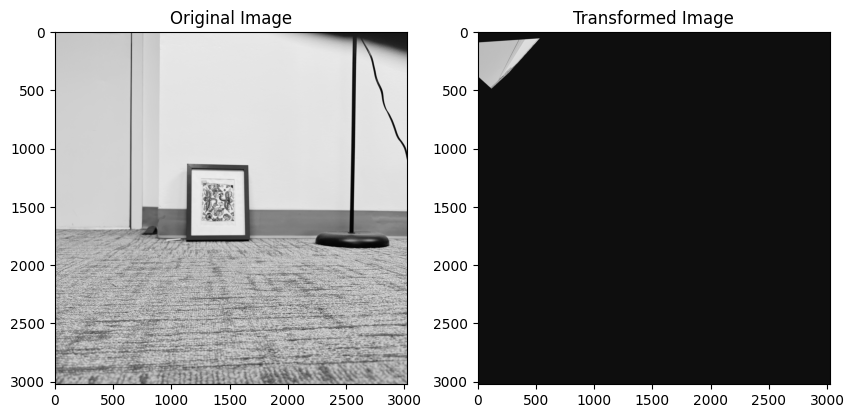

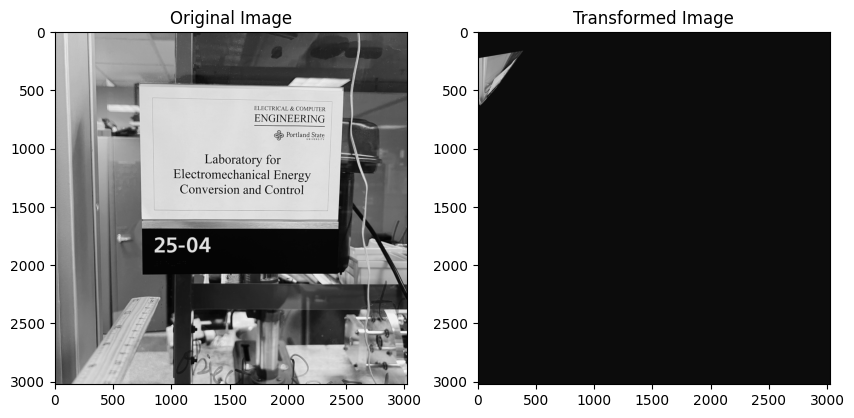

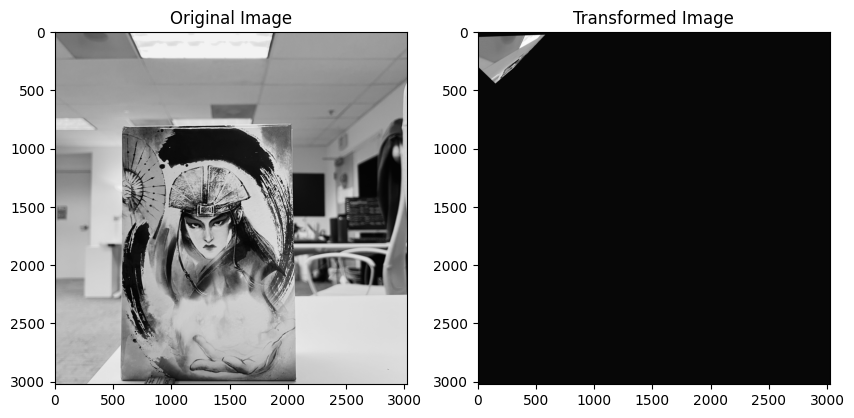

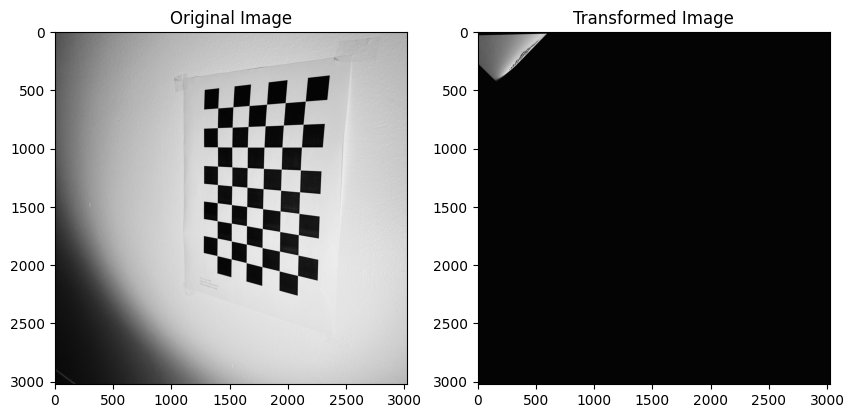

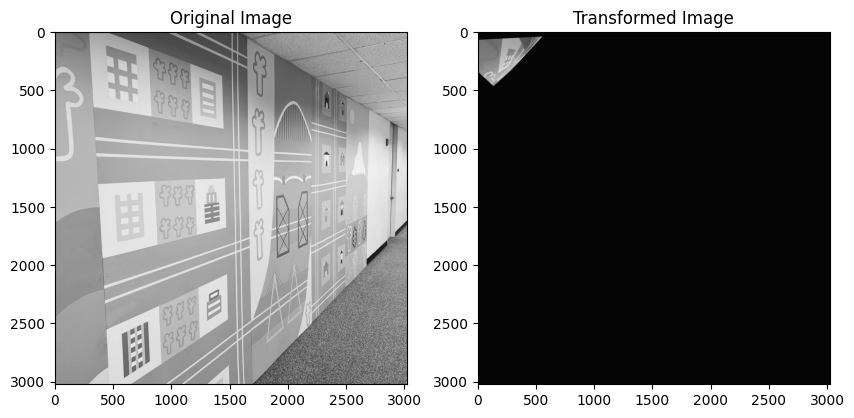

In [18]:
# Define transformation parameters
std_dev = 1
rotation_range = 10
intensity_scale_range = (0.95, 1.05)
brightness_range = (-0.10, 0.10)
import cv2



# Process each image
for i, img in enumerate(images_dict.keys()):
    img = cv2.imread(dir + img + '.jpg', cv2.IMREAD_GRAYSCALE)
    
    # Generate random camera position and rotation
    camera_position = np.random.normal(scale=std_dev, size=3)
    rotation_angle = np.random.uniform(0, rotation_range)
    
    # Generate perspective transformation matrix
    pts1 = np.float32([[50,50],[200,50],[50,200],[200,200]])
    pts2 = np.float32([[10,100],[200,50],[100,250],[200,200]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    
    # Apply perspective transformation
    img_transformed = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    
    # Apply rotation
    center = (img_transformed.shape[1] / 2, img_transformed.shape[0] / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1)
    img_transformed = cv2.warpAffine(img_transformed, rotation_matrix, (img_transformed.shape[1], img_transformed.shape[0]))
    
    # Randomly alter intensity scale and brightness
    intensity_scale = np.random.uniform(*intensity_scale_range)
    brightness = np.random.uniform(*brightness_range)
    img_transformed = cv2.convertScaleAbs(img_transformed, alpha=intensity_scale, beta=brightness*255)
    
    # Display original and transformed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
    plt.title('Transformed Image')
    plt.show()

In [ ]:
# # Work on one image initially:
# img = 'frame.jpg'
# img = cv.imread(dir + img, cv.IMREAD_GRAYSCALE)
# def img_settings ():
#     # position settings:
#     # loc = mean, scale = std deviation. x,y, and z are the camera 3D coordinates
#     x,y,z = np.random.normal(loc=0,scale=1,size=3)
#     # angle rotation
#     angle = random.uniform(a=0,b=10)
#     axis = np.random.randn(3)
#     # Image intensity settings:
#     alpha = random.uniform(a=0.95,b=1.05)
#     beta = random.uniform(a=-0.10,b=0.10)
    
#     return x,y,z,angle,axis,alpha,beta

# def apply_settings (img, x, y, angle, axis, alpha, beta):
#     # Get rotation matrix:
#     rotation_matrix = cv.Rodrigues(angle * axis)[0]
#     # Initialize perspective transformation matrix:
#     perpsective_matrix = np.float32([[alpha, 0, 0],
#                                   [0, alpha, 0],
#                                   [beta, beta, 1]]
#                                  )
#     transformed_image = cv.warpPerspective(img, perpsective_matrix, (img.shape[1], img.shape[0]))
#     transform_matrix = np.zeros((2,3))
#     transform_matrix[:,:2] = rotation_matrix[:2,:2]
#     transform_matrix[:,2] = [x,y]
#     # Initialize position settings:
#     # transformed_image = cv.resize(transformed_image, (img.shape[1] + int(x), img.shape[0] + int(y)))
#     # transformed_image = cv.warpAffine(src = transformed_image, M = np.float32([[1, 0, x], [0, 1, y]]), dsize=(img.shape[1], img.shape[0]))
#     # Initialize orientation settings:
#     # The wrappAffine takes a 2x2 rotation matrix, or M. 
#     transformed_image = cv.warpAffine(src=transformed_image, M=transform_matrix, dsize=(img.shape[1], img.shape[0]))
    
#     return transformed_image



# x,y,z,angle,axis, alpha,beta = img_settings()
# x = apply_settings(img, x, y, angle, axis, alpha, beta)
# plt.imshow(x, cmap='gray')
    
    